In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import keras

In [3]:
import seaborn as sns 
dt = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')

dt.head(3)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False


In [4]:
dt.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

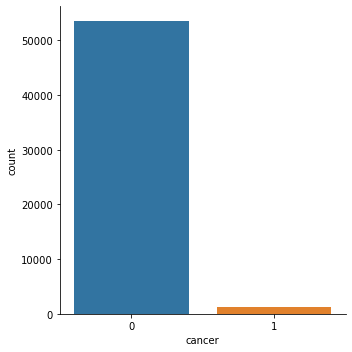

In [5]:
sns.catplot(x='cancer', data=dt, kind='count')

In [6]:
cc = len(dt[dt['cancer']==1])
nc = len(dt[dt['cancer']==0])
print(cc, ' ',nc)

1158   53548


In [7]:
path = '/kaggle/input/rsna-breast-cancer-detection/train_images/'

dt['paths'] = (path+dt['patient_id'].astype(str)+'/'+dt['image_id'].astype(str)+'.dcm').astype(str)


In [8]:
dt.head(2)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,paths
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-breast-cancer-detection/tra...
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-breast-cancer-detection/tra...


In [9]:
dt.paths[1]

'/kaggle/input/rsna-breast-cancer-detection/train_images/10006/1459541791.dcm'

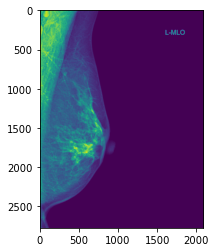

In [10]:
import pydicom as dicom

ds = dicom.dcmread(dt.paths[5])

plt.imshow(ds.pixel_array)

In [11]:
dt.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
paths                          0
dtype: int64

In [12]:
cc = len(dt[dt['cancer']==1])
nc = len(dt[dt['cancer']==0])
print(cc, ' ',nc)

1158   53548


In [13]:
dtcc = dt[dt['cancer']==1]
dtnc = dt[dt['cancer']==0]

from sklearn.utils import shuffle
dtnc = shuffle(dtnc)
dtnc = dtnc.iloc[0:3000]

dt2 = pd.concat([dtcc, dtnc])
dt2 = shuffle(dt2)

cc = len(dt2[dt2['cancer']==1])
nc = len(dt2[dt2['cancer']==0])
print(cc, ' ',nc)

1158   3000


In [14]:
!mkdir ./mlo
!mkdir ./mlo/train
!mkdir ./mlo/train
!mkdir ./mlo/train/c
!mkdir ./mlo/train/n

!mkdir ./mlo/test
!mkdir ./mlo/test
!mkdir ./mlo/test/c
!mkdir ./mlo/test/n

!mkdir ./cc
!mkdir ./cc/train
!mkdir ./cc/train
!mkdir ./cc/train/c
!mkdir ./cc/train/n

!mkdir ./cc/test
!mkdir ./cc/test
!mkdir ./cc/test/c
!mkdir ./cc/test/n

mkdir: cannot create directory ‘./mlo/train’: File exists
mkdir: cannot create directory ‘./mlo/test’: File exists
mkdir: cannot create directory ‘./cc/train’: File exists
mkdir: cannot create directory ‘./cc/test’: File exists


In [15]:
dt2.head(2)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,paths
45625,1,5911,1491483248,R,MLO,74.0,1,1,1,0.0,0,C,49,False,/kaggle/input/rsna-breast-cancer-detection/tra...
14162,2,25153,1664212082,R,CC,68.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-breast-cancer-detection/tra...


In [16]:
row = dt2[1:2]

stst = ('./'+row['view'].str.lower().astype(str)+'/test/c/'+row['image_id'].astype(str)+'.jpg').to_string(index=False)
stst

'./cc/test/c/1664212082.jpg'

In [17]:
row = dt2[2:5]
row.iloc[2,5]

62.0

In [18]:
row

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,paths
53442,1,862,684538323,L,MLO,65.0,0,0,0,NaN,0,C,49,False,/kaggle/input/rsna-breast-cancer-detection/tra...
27107,2,38946,1288050525,R,CC,64.0,1,1,1,NaN,0,NaN,29,False,/kaggle/input/rsna-breast-cancer-detection/tra...
49179,2,63072,2026116467,R,MLO,62.0,0,0,0,NaN,0,NaN,48,False,/kaggle/input/rsna-breast-cancer-detection/tra...


In [19]:

a = 0
cant = len(row)
while a < cant:
    print(row.iloc[a,14])
    a+=1

/kaggle/input/rsna-breast-cancer-detection/train_images/862/684538323.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/38946/1288050525.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/63072/2026116467.dcm


In [101]:
!pip install GDCM
!pip install pylibjpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.4 MB/s eta 0:00:0000:0100:010m


In [121]:
!conda install gdcm -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - gdcm=22.11.1

Current channels:

  - https://conda.anaconda.org/rapidsai/linux-64
  - https://conda.anaconda.org/rapidsai/noarch
  - https://conda.anaconda.org/nvidia/linux-64
  - https://conda.anaconda.org/nvidia/noarch
  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [22]:
!pip install python-gdcm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 34.5 MB/s eta 0:00:0000:0100:01


In [ ]:
!conda install -c conda-forge pillow -y
!conda install -c conda-forge pydicom -y
!conda install -c conda-forge gdcm -y
!pip install pylibjpeg pylibjpeg-libjpeg

In [34]:
!conda install gdcm -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.

Retrieving notices: ...working... done


In [ ]:
!conda update gdcm -y

In [41]:
!pip install pylibjpeg
import pylibjpeg

In [ ]:
########### importar pylibjpeg y NO importar gdcm

In [42]:
import pydicom
from PIL import Image


train_size = 0.20
tc = round(len(dt2[dt2['cancer']==1])*train_size ,0)
tn = round(len(dt2[dt2['cancer']==0])*train_size ,0)
count_c = 0
count_n = 0

#for rows in dt2:
cont = 0
cant = len(dt2)
while cont < cant:

    #im = pydicom.dcmread(rows['paths'])
    im = pydicom.dcmread(dt2.iloc[cont,14])
    #im = pydicom.dcmread(rows['paths'].to_string(index=False))
    im = im.pixel_array.astype(float)

    rescaled_image = (np.maximum(im,0)/im.max())*255
    final_image = np.uint8(rescaled_image)

    final_image = Image.fromarray(final_image)
    
    
    #if row['laterality'] == 'L':
    if dt2.iloc[cont,3] == 'L':
         final_image = PIL.ImageOps.mirror(final_image) ### this flip the images from the left
    

    #if row['cancer'] == 1: #cancer
    if dt2.iloc[cont,6] == 1: #cancer
        count_c += 1
        
        if count_c < tc: #test
            #final_image.save(('./'+row['view'].str.lower().astype(str)+'/test/c/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))
            final_image.save(('./'+dt2.iloc[cont,4].str.lower().astype(str)+'/test/c/'+dt2.iloc[cont,2].astype(str)+'.jpg').to_string(index=False))
            
            
        else: #train
            #final_image.save(('./'+row['view'].str.lower().astype(str)+'/train/c/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))
            final_image.save(('./'+dt2.iloc[cont,4].str.lower().astype(str)+'/train/c/'+dt2.iloc[cont,2].astype(str)+'.jpg').to_string(index=False))
    
    if row['cancer'] == 0: #no cancer
        count_n += 1
        
        if count_n < tn: #test
            #final_image.save(('./'+row['view'].str.lower().astype(str)+'/test/n/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))
            final_image.save(('./'+dt2.iloc[cont,4].str.lower().astype(str)+'/test/n/'+dt2.iloc[cont,2].astype(str)+'.jpg').to_string(index=False))

        else: #train
            #final_image.save(('./'+row['view'].str.lower().astype(str)+'/train/n/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))
            final_image.save(('./'+dt2.iloc[cont,4].str.lower().astype(str)+'/train/n/'+dt2.iloc[cont,2].astype(str)+'.jpg').to_string(index=False))

            
    cont += 1
        

RuntimeError: The following handlers are available to decode the pixel data however they are missing required dependencies: GDCM (req. ), pylibjpeg (req. )

In [80]:

import pydicom
from PIL import Image

train_size = 0.20
tc = round(len(dt2[dt2['cancer']==1])*train_size ,0)
tn = round(len(dt2[dt2['cancer']==0])*train_size ,0)
count_c = 0
count_n = 0

for rows in dt2:
    
    im = pydicom.dcmread(rows['paths'])
    #im = pydicom.dcmread(rows['paths'].to_string(index=False))
    im = im.pixel_array.astype(float)

    rescaled_image = (np.maximum(im,0)/im.max())*255
    final_image = np.uint8(rescaled_image)

    final_image = Image.fromarray(final_image)
    
    
    if dt['laterality'] == 'L':
         final_image = PIL.ImageOps.mirror(final_image) ### this flip the images from the left
    

    if row['cancer'] == 1: #cancer
        count_c += 1
        
        if count_c < tc: #test
            final_image.save(('./'+row['view'].str.lower().astype(str)+'/test/c/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))
            
        else: #train
            final_image.save(('./'+row['view'].str.lower().astype(str)+'/train/c/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))
    
    if row['cancer'] == 0: #no cancer
        count_n += 1
        
        if count_n < tn: #test
            final_image.save(('./'+row['view'].str.lower().astype(str)+'/test/n/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))

        else: #train
            final_image.save(('./'+row['view'].str.lower().astype(str)+'/train/n/'+row['image_id'].astype(str)+'.jpg').to_string(index=False))

        
    

TypeError: string indices must be integers

In [21]:
import pydicom
import PIL
from PIL import Image

im = pydicom.dcmread('/kaggle/input/rsna-breast-cancer-detection/train_images/10006/1459541791.dcm')
im = im.pixel_array.astype(float)

rescaled_image = (np.maximum(im,0)/im.max())*255 # float pixels
final_image = np.uint8(rescaled_image) # integers pixels

final_image = Image.fromarray(final_image)



final_image = PIL.ImageOps.mirror(final_image) #### rotar
final_image.save('aaa.jpg')


In [8]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                        zoom_range=0.2,
                                        vertical_flip=True,
                                        horizontal_flip=True,
                                        rescale=1/255)




validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/rsna-breast-cancer-detection/train_images',
        shuffle=True,
        target_size=(2000, 2500),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb')

validation_generator = validation_datagen.flow_from_directory(
        '/kaggle/input/rsna-breast-cancer-detection/test_images',
        shuffle=True,
        target_size=(208, 176),
        batch_size=32,
        class_mode='categorical',
        color_mode='rgb')

NameError: name 'ImageDataGenerator' is not defined